# Starting

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
my_local_drive='/content/gdrive/My Drive/Colab Notebooks/FakeNews'
# Ajout du path pour les librairies, fonctions et données
sys.path.append(my_local_drive)
# Se positionner sur le répertoire associé
%cd $my_local_drive

%pwd

/content/gdrive/My Drive/Colab Notebooks/FakeNews


'/content/gdrive/My Drive/Colab Notebooks/FakeNews'

# Loading a smaller dataset (Optional) 

In [214]:
df = pd.read_csv("claimskg.csv")
df.columns

Index(['id', 'text', 'date', 'truthRating', 'ratingName', 'author', 'headline',
       'named_entities_claim', 'named_entities_article', 'keywords', 'source',
       'sourceURL', 'link', 'language'],
      dtype='object')

In [215]:
f = lambda x : 1 if (x == 3) else 0
df["truthRating"] = df["truthRating"].apply(f)

In [216]:
import random
from sklearn.model_selection import train_test_split 


In the example below we choose n examples of True and n False

In [217]:
df2 = df.copy()
df2 = df[["text","truthRating"]]
bool_0 = df2["truthRating"] == 0
bool_1 = df2["truthRating"] == 1
idx0 = [i for i, x in enumerate(bool_0) if x]
idx1 = [i for i, x in enumerate(bool_1) if x]
# selecting n index of Fake News and True News
idx_0 = random.sample(idx0, 500)	
idx_1 = random.sample(idx1, 500)	

In [218]:
idx_selected = np.sort(np.concatenate((idx_0,idx_1), axis=None))
df2 = df2.iloc[idx_selected]
train, test = train_test_split(df2, test_size=0.3, random_state=42, shuffle=True)

Saving Data in 2 csv file

In [219]:
train.to_csv("train.csv",sep=';')
test.to_csv("test.csv",sep=';')

In [220]:
test.describe()

,truthRating
count,300.000000
mean,0.440000
std,0.497216
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


# Ingenierie Textuelle

### Installation Packages & Loading Data

In [221]:
!pip install langdetect 
!pip install contractions

In [222]:
# Importation des différentes librairies utiles pour le notebook

#Sickit learn met régulièrement à jour des versions et 
#indique des futurs warnings. 
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# librairies générales
import pickle 
import pandas as pd
from scipy.stats import randint
import numpy as np
import string
import time
import base64
import re
import sys

import contractions

# librairie BeautifulSoup
from bs4 import BeautifulSoup

# librairie affichage
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud

## detection de language
import langdetect 

import nltk
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import RegexpParser

# il est possible de charger l'ensemble des librairies en une seule fois 
# décocher le commentaire de la ligne ci-dessous
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
nltk.download('tagsets')
nltk.download("stopwords")
nltk.download('wordnet')

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer

import spacy
from spacy.tokens import Span
# il faut sélectionner pour quelle langue les traitements vont être faits.
nlp = spacy.load('en')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [223]:
df_train = pd.read_csv("train.csv",sep=";")
df_test = pd.read_csv("test.csv",sep=";")

In [224]:
df_train = df_train[["text","truthRating"]]
df_test = df_test[["text","truthRating"]]

### Text Preprocessing





In [225]:
# TO DO
# Eliminate handles and URLs
# Tokenize the string into words. 
# Remove stop words like "and, is, a, on, etc."
# Stemming- or convert every word to its stem. Like dancer, dancing, danced, becomes 'danc'. You can use porter stemmer to take care of this. 
# Convert all your words to lower case
# BONUS here getting rid of all numbers which has been captured like word when preprocess

In [233]:
text = np.concatenate((df_train["text"],df_test["text"]))

def contains_digit(word):
  for c in word:
    if c.isdigit():
      return True
  return False

stopwords = np.array(nltk.corpus.stopwords.words('english'))

for i,sentence in zip(range(len(text)),text):
  # Removing punctuation
  tokenizer = nltk.RegexpTokenizer(r"\w+")
  sentence = tokenizer.tokenize(sentence)

  sentence = " ".join(sentence)
  sentence = word_tokenize(sentence)

  # converting each word to lowercase
  sentence = [word.lower() for word in sentence if not word in stopwords]

  # Removing stopwords
  sentence = [word for word in sentence if not word in stopwords]

  # Removing word with only one letter
  sentence = [word for word in sentence if len(word) != 1]

  # Removing word with digits
  sentence = [word for word in sentence if not contains_digit(word)]

  # lemmatizer words 
  lemmatizer = WordNetLemmatizer()
  sentence = [lemmatizer.lemmatize(word) for word in sentence]

  #Removing pronouns infinitive verbs dt...
  for word in nltk.pos_tag(sentence):
    word_to_keep = []
    if word[1] not in ['IN', 'PP', 'DT','PRP$','VB','MD']:
      word_to_keep.append(word[0])
  
  sentence = (" ").join(sentence)
  text[i] = sentence

In [234]:
df_train["text"] = text[:len(df_train)]
df_test["text"] = text[len(df_train):]

# Classifieur Binaires

Before running the classifier we need to compute the fake frequency and non fake frequency of each word. By this I mean counting each word appareance in the fake corpus (set of all fake post) and in the non fake corpus (set of all non fake post. From approximatively 3000 features one corresponding to each word we are now only dealing with 2.


## Logistic Regression

### preprocessing for Logistic regression

In [235]:
# Last step of preprocessing = vectorizing the text
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(text)
corpus = np.array(vectorizer.get_feature_names())

In [273]:
def get_fake_no_fake_text(text):
  idx0a = np.array(df_train[df_train["truthRating"] == 0].index)
  idx0b = np.array(df_test[df_test["truthRating"] == 0].index+len(df_train))
  idx0 = np.concatenate((idx0a, idx0b), axis=0)  
  idx1a = np.array(df_train[df_train["truthRating"] == 1].index)
  idx1b = np.array(df_test[df_test["truthRating"] == 1].index+len(df_train))
  idx1 = np.concatenate((idx1a, idx1b), axis=0)
  fake_text = text[idx0]
  non_fake_text = text[idx1]
  return fake_text,non_fake_text


def compute_frequency(fake_text,non_fake_text):
  # Computes 2 different frequency use of dictionary for O(1) time acces to value of a paticular word
  fake_text = " ".join(fake_text)
  fake_text = word_tokenize(fake_text)
  non_fake_text = " ".join(non_fake_text)
  non_fake_text = word_tokenize(non_fake_text)
  corpus = np.unique(np.concatenate((fake_text,non_fake_text),axis=0))

  FakeFreq = {w:0 for w in corpus}
  NonFakeFreq = {w:0 for w in corpus}

  for word in fake_text:
    FakeFreq[word] += 1

  for word in non_fake_text:
    NonFakeFreq[word] += 1

  return FakeFreq,NonFakeFreq


Before running the logistic regression algorithm we need to compute the frequency of each word in the 2 corpus
<br>

The training example will the have the following format with 1 for the bias term. 
$$ X^{(i)} = \begin{pmatrix}
1 \\
X_{Fake}^{(i)} \\
X_{NoFake}^{(i)} 
\end{pmatrix} $$


In [274]:
fake_text,non_fake_text= get_fake_no_fake_text(text)
FakeFreq,NonFakeFreq = compute_frequency(fake_text,non_fake_text)

In [276]:
def feat_extraction_fake(row):
  row_text = word_tokenize(row)
  sum_fake_freq = 0
  for word in row_text:
    sum_fake_freq += FakeFreq[word]
  return sum_fake_freq


def feat_extraction_no_fake(row):
  row_text = word_tokenize(row)
  sum_non_fake_freq = 0
  for word in row_text:
    sum_non_fake_freq += NonFakeFreq[word]
  return sum_non_fake_freq

In [277]:
df_train["bias"] = 1
df_train["fake"] = df_train["text"].apply(feat_extraction_fake)
df_train["no fake"] = df_train["text"].apply(feat_extraction_no_fake)

df_test["bias"] = 1
df_test["fake"] = df_test["text"].apply(feat_extraction_fake)
df_test["no fake"] = df_test["text"].apply(feat_extraction_no_fake)

df_X_train = df_train[["fake","no fake"]]
df_X_test = df_test[["fake","no fake"]]

In [ ]:
df_X_train.head(5)

Logistic Regression implementation:
<br>
In short we are the trying to minimize the following cost function with the help to the famous gradient descent algorithm.
<br>
$$ J(θ) = -\dfrac{1}{m}*\sum_{i=1}^{m}[ \log h(x^{(i)},θ) + (1 - y^{(i)})*log(1 - h(x^{(i)},θ))] $$
<br>
with h the sigmoid function define as follow $$ h(x^{i},θ) = \dfrac{1}{1 + e^{-θ^{T}*x^{(i)}}} $$

<br>

$m =$ number of training examples
<br>

$x(i) =$ i-th example of the training set 
<br>

Thus we make sure to resolve a convex problem and by this gradient descent find a global minima.

### Training

In [279]:
from sklearn.linear_model import LogisticRegression


X_train,y_train = df_X_train.values,df_train["truthRating"] 
X_test,y_test = df_X_test,df_test["truthRating"]

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report

target_names = ["Fake","No Fake"]

print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        Fake       0.88      0.82      0.85       168
     No Fake       0.79      0.86      0.83       132

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Etant donnée la simplicité de nos features seulement 2 il n'est pas nécesaire ici d'appliquer des algorithmes de classifications plus performant sachant qu'ici une simple regression répond très bien à notre problème.

### Classification avec le max

In [ ]:
## TO DO!

## Naives Bayes

<br>

Naives Bayes Approach Inference Rules for binary classification.
<br>

$$\prod_{i=1}^{n} \dfrac{P \left( wi \middle| \ Fake \right)}{P \left( wi \middle| \ NonFake \right)}$$
<br>
This expression says that we're going to take the product across all of the words (n words) in a post of the probability for each word in the fake class divide it by the probability in the non fake class
<br>

Laplacian Smoothing technique to avoid zero probability issue with the formula above
<br>

$$P \left( wi \middle| \ class \right) = \dfrac{freq(wi,class)+1}{Nc + Vc} \\ class \in \{ Fake , Non Fake \} $$
<br>

$N_c = \ $frequency of all words in class 
class
<br>

​$V =\ $number of unique words in vocabulary
<br>

In [280]:
X_train,y_train = df_train["text"],df_train["truthRating"] 
X_test,y_test = df_test["text"],df_test["truthRating"] 

# importing useful modules
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# creating a model based on Miultinomial Naive Bayes
model = make_pipeline(CountVectorizer(), MultinomialNB())

# Training
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [281]:
target_names = ["Fake","No Fake"]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        Fake       0.61      0.46      0.52       168
     No Fake       0.47      0.62      0.54       132

    accuracy                           0.53       300
   macro avg       0.54      0.54      0.53       300
weighted avg       0.55      0.53      0.53       300



# Entrainement Modèle

### import useful module

In [50]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import random

In [ ]:
X_train,y_train = df_train["text"].values,df_train["truthRating"].values
X_test,y_test = df_test["text"].values,df_test["truthRating"].values 

### Cross Validation

In [58]:
models = []
models.append(('LRregression', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('RandomForest', RandomForestClassifier(n_estimators = 10)))

In [59]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = KFold(n_splits=5, shuffle=False)
  model = make_pipeline(TfidfVectorizer(), model)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LRregression: 0.570000 (0.030439)
KNN: 0.541429 (0.077116)
DecisionTreeClassifier: 0.532857 (0.036867)
SVM: 0.580000 (0.029416)
RandomForest: 0.575714 (0.023299)


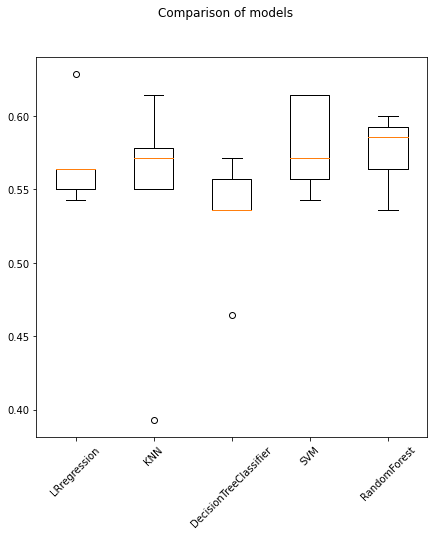

In [60]:
fig = plt.figure(figsize=(7,7))
fig.suptitle('Comparison of models')
ax = fig.add_subplot(111)
ax.boxplot(results)
ax.set_xticklabels(names,rotation = 45)
plt.show()

### Entrainement sur le Test Set avec affinement des paramètres des meilleurs classifieurs

In [64]:
model = RandomForestClassifier(n_estimators = 10)

In [66]:
model = make_pipeline(TfidfVectorizer(), model)
model.fit(X_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=10))])

In [67]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [68]:
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report
target_names = ["Fake","No Fake"]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        Fake       0.53      0.52      0.53       147
     No Fake       0.55      0.56      0.56       153

    accuracy                           0.54       300
   macro avg       0.54      0.54      0.54       300
weighted avg       0.54      0.54      0.54       300



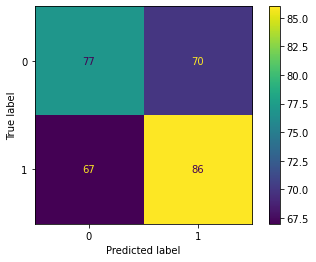

In [69]:
plot_confusion_matrix(model, X_test, y_test)
plt.show()

In [70]:
grid_param = {'n_estimators': [4, 6, 9, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

In [71]:
gd_srRF = GridSearchCV(estimator=RandomForestClassifier(),
                    param_grid=grid_param,
                    scoring='accuracy',
                    cv=5,
                    n_jobs=-1,
                    return_train_score=True)

In [ ]:
gd_srRF.fit(X_train, y_train)
print ('meilleur score ',
 gd_srRF.best_score_,'\n')
print ('meilleurs paramètres',
 gd_srRF.best_params_,'\n')
print ('meilleur estimateur',
gd_srRF.best_estimator_,'\n')

<p>
Le modèle performe très mal un processing supplémentaire sur les données va êtres nécessaires accuracy obtenu avec le TF_IDF seulement 55~60%
</p>
<p>
[EDIT] Avec de la feature extraction + term frequency résultat ~90% Bien meilleur !
</p>

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_param = {  
    'C' : [0.001,0.01,0.1,1,10,100]
}


gd_srLR = GridSearchCV(estimator=LogisticRegression(),  
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1,
                    return_train_score=True)

gd_srLR.fit(X_train, y_train)
print ('meilleur score ',
 gd_srLR.best_score_,'\n')
print ('meilleurs paramètres',
 gd_srLR.best_params_,'\n')
print ('meilleur estimateur',
gd_srLR.best_estimator_,'\n')

In [ ]:
grid_param = {
    'C': [0.001, 0.01, 0.1, 1, 10], 
    'gamma' : [0.001, 0.01, 0.1, 1], 
    'kernel': ['linear','rbf']}

gd_srSVM = GridSearchCV(estimator=SVC(),  
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=1,
                    return_train_score=True)

gd_srSVM.fit(X_train, y_train)  

print ('meilleur score ',gd_srSVM.best_score_,'\n')
print ('meilleurs paramètres', gd_srSVM.best_params_,'\n')
print ('meilleur estimateur',gd_srSVM.best_estimator_,'\n')

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Creation d'une instance de l'algorithme en utilisant les meilleurs paramètres
svc = gd_srSVM.best_estimator_

svc.fit(X_train, y_train)
result = svc.predict(X_test)
print('\n accuracy: ', accuracy_score(result, y_test),'\n')

conf = confusion_matrix(y_test, result)
print ('\n matrice de confusion \n',conf)
print ('\n',classification_report(y_test, result))